In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
from numpy.linalg import matrix_power
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
n_images = 250
my_number = 7
images = []

while len(images) != n_images:
    idx = random.randint(7, 25000)
    image_name = f'im{idx}.jpg'
    image = cv2.imread(glob.glob(f'./mirflickr/{image_name}')[0])[:, :, 1]
    images.append(image)
    
images = np.asarray(images)
assert len(images) == n_images

# Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

In [3]:
def pca_compres(image, components = None, inverse = True):
    pca = PCA(n_components=components, svd_solver='full')
    res = pca.fit_transform(image)
    if inverse:
        return pca.inverse_transform(res)
    return pca, res

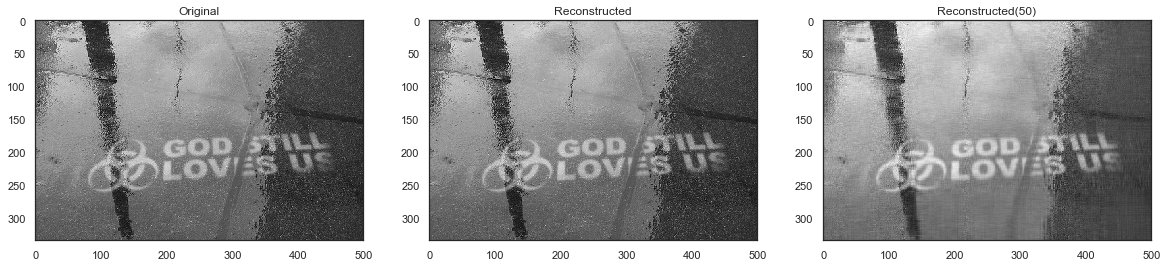

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Original')
plt.imshow(images[0], cmap='gray')

plt.subplot(132)
plt.title('Reconstructed')
plt.imshow(pca_compres(images[0]), cmap='gray')

plt.subplot(133)
plt.title('Reconstructed(50)')
plt.imshow(pca_compres(images[0], components=50), cmap='gray');

# Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

In [5]:
pca, compressed = pca_compres(images[0], inverse = False)
pca.singular_values_

array([7917.64952587, 3258.60843478, 2856.20994824, 1947.1495284 ,
       1514.95740558, 1374.95718115, 1318.17791868, 1131.73013254,
       1104.24567856, 1037.66471961,  942.55134011,  887.65073173,
        789.17745915,  759.3438253 ,  730.10665592,  693.46822298,
        664.44796052,  646.31864359,  635.29768618,  626.36125155,
        610.22176917,  605.31791372,  596.18681439,  587.11358293,
        579.86310904,  568.86789597,  559.64736437,  554.2558766 ,
        549.59350951,  542.10123471,  535.44552025,  527.31712975,
        525.03134689,  520.87665977,  516.31814849,  510.52013389,
        507.08343932,  504.53825472,  497.18611588,  492.06114619,
        488.45622169,  479.93884422,  478.47245706,  473.65634816,
        471.24183244,  467.65492336,  464.67381609,  460.89680689,
        457.64249955,  452.39340389,  449.93658992,  446.5962238 ,
        443.64252967,  439.70247067,  436.34623219,  428.27357022,
        427.11909495,  425.03163994,  422.63490181,  416.30646

image shape:  (335, 500)
MSE 10% components 33:  118.27496763395659
MSE 20% components 67:  76.23258228402933
MSE 30% components 100:  50.42783138028608
MSE 40% components 134:  32.18933093906592
MSE 50% components 167:  20.130663205258205
MSE 60% components 201:  11.674600917872004
MSE 70% components 234:  6.253430430051964
MSE 80% components 268:  2.7535567208626706
MSE 90% components 301:  0.8427575370198888
MSE 100% components 335:  1.846353018582103e-26


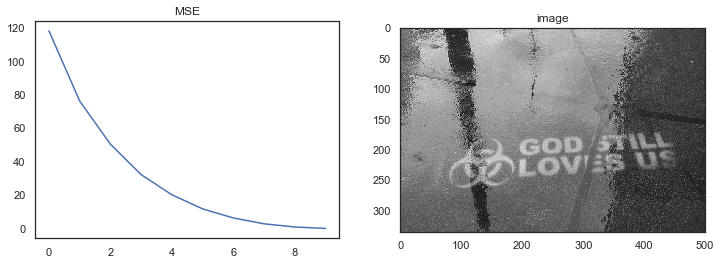

image shape:  (375, 500)
MSE 10% components 37:  210.44732644727333
MSE 20% components 75:  78.20512906309898
MSE 30% components 112:  35.673298541155724
MSE 40% components 150:  16.346022568260214
MSE 50% components 187:  7.527739659310213
MSE 60% components 225:  3.045212779066606
MSE 70% components 262:  1.024739426935435
MSE 80% components 300:  0.2062445163557219
MSE 90% components 337:  0.009114826339095447
MSE 100% components 375:  1.2127183054304466e-25


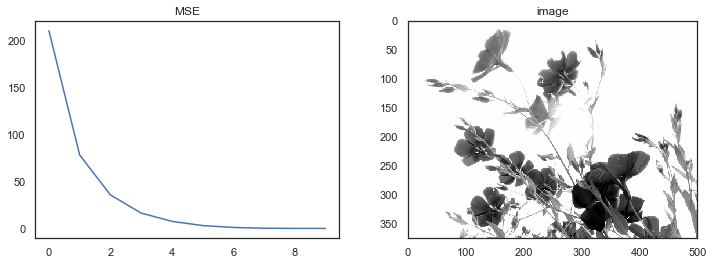

image shape:  (335, 500)
MSE 10% components 33:  56.030923927089546
MSE 20% components 67:  5.292373580404574
MSE 30% components 100:  0.13412643780477027
MSE 40% components 134:  0.0011473590813230875
MSE 50% components 167:  1.6708386637718555e-25
MSE 60% components 201:  1.6762656362783058e-25
MSE 70% components 234:  1.68146280394835e-25
MSE 80% components 268:  1.687375873568939e-25
MSE 90% components 301:  1.6925437169478754e-25
MSE 100% components 335:  1.6974971763317653e-25


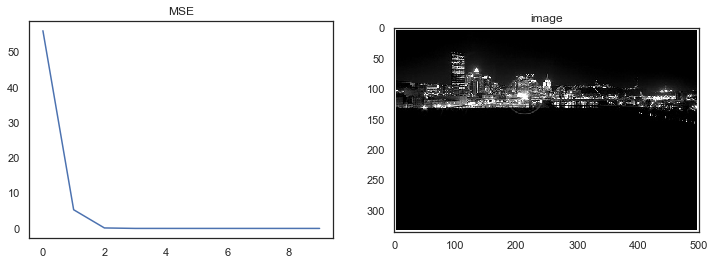

image shape:  (348, 500)
MSE 10% components 34:  253.52884977809137
MSE 20% components 69:  88.87605897198256
MSE 30% components 104:  31.72656207785334
MSE 40% components 139:  11.009385654438217
MSE 50% components 174:  3.7642988679667533
MSE 60% components 208:  1.290949181091548
MSE 70% components 243:  0.3770258636899974
MSE 80% components 278:  0.07177455445534485
MSE 90% components 313:  0.0042765565123614666
MSE 100% components 348:  2.275810037499319e-25


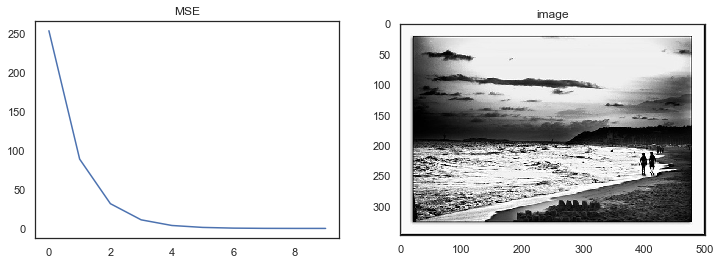

image shape:  (500, 375)
MSE 10% components 37:  74.01899083870968
MSE 20% components 75:  22.280315943936483
MSE 30% components 112:  8.38312965172348
MSE 40% components 150:  3.1702763674326766
MSE 50% components 187:  1.1584929318051242
MSE 60% components 225:  0.41312876345815297
MSE 70% components 262:  0.14845179035224262
MSE 80% components 300:  0.04585098204346934
MSE 90% components 337:  0.009998330897723602
MSE 100% components 375:  2.436940375634384e-25


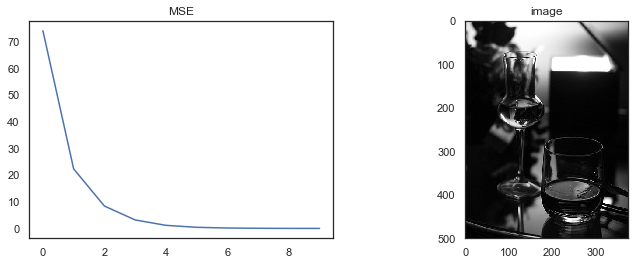

In [6]:
for image in images[:5]:
    image_errors = list()
    print('image shape: ', image.shape)
    
    for i in range(1, 10 + 1):
        comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
        res = pca_compres(image, components = comp_n )
        error = mean_squared_error(image, res)
        image_errors.append(error)
        print(f'MSE {i*10}% components {comp_n}: ', error) 
        
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title('MSE')
    plt.plot(image_errors)
    
    plt.subplot(122)
    plt.title('image')
    plt.imshow(image, cmap='gray')
    plt.show();

In [7]:
def total_mse(data):
    total_mse = np.zeros(10, )
    for image in data:
        
        sample_errors = list()
        
        for i in range(1, 10 + 1):
            comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
            res = pca_compres(image, components = comp_n )
            error = mean_squared_error(image, res)
            sample_errors.append(error)
            
        np.add(total_mse, np.array(sample_errors), out = total_mse)
    return total_mse / len(data)

213.32659528414047 104.57573659701019 56.75489172423939 30.829141273752533 16.373234924138973 8.159277148941905 3.664719042534331 1.3531667803267367 0.3367727429368824 5.542853136610484e-26


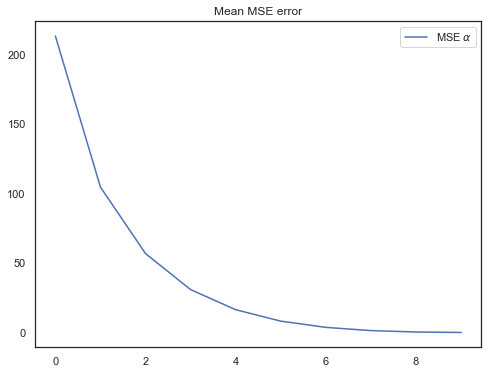

In [8]:
error = total_mse(images)
print(*error)
plt.figure(figsize=(8, 6))
plt.title('Mean MSE error')
plt.plot(error, label='MSE $\\alpha$')
plt.legend()
plt.show();

# Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку $𝑀_1$: 
### Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів: 

(335, 500)


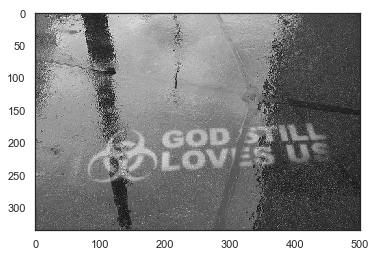

In [9]:
plt.imshow(images[0], cmap='gray') 
print(images[0].shape)

In [10]:
def normalize_matrix(matrix):
    row_sums = matrix.sum(axis = 1)
    res = matrix / row_sums[:, np.newaxis]
    return res

 - По горизонталі, зліва направо

In [11]:
def image_iteration_left_right(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i][j + 1]
            matrix[val_2][val_1] += 1
    return matrix

- По горизонталі, справа наліво

In [12]:
def image_iteration_right_left(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][w - j - 2]
            val_2 = image[i][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix    

- По вертикалі, зверху вниз

In [13]:
def image_iteration_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[i][j]
            val_2 = image[i + 1][j]
            matrix[val_2][val_1] += 1
    return matrix  

- По вертикалі, знизу вгору

In [14]:
def image_iteration_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[h - i - 2][j]
            val_2 = image[h - i - 1][j]
            matrix[val_1][val_2] += 1
    return matrix  

- По головній діагоналі, зверху вниз

In [15]:
def main_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i + 1][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

 - По головній діагоналі, знизу вгору

In [16]:
def main_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 2][w - j - 2]
            val_2 = image[h - i - 1][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix  

- По побічній діагоналі, зверху вниз

In [17]:
def opposite_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][w - j - 1]
            val_2 = image[i + 1][w - j - 2]
            matrix[val_2][val_1] += 1
    return matrix  

 - По побічній діагоналі, знизу вгору

In [18]:
def opposite_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 1][j]
            val_2 = image[h - i - 2][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [19]:
def general_stochastic_matrix(data, hmm_type = 'h_left_right'):
    stochastic_matrix = np.zeros((256, 256))
    if hmm_type == 'h_left_right':
        for image in data:
            image_iteration_left_right(image, stochastic_matrix)
                
    if hmm_type == 'h_right_left':
        for image in data:
            image_iteration_right_left(image, stochastic_matrix)
                
    if hmm_type == 'v_top_down':
        for image in data:
            image_iteration_top_down(image, stochastic_matrix)
                
    if hmm_type == 'v_down_up':
        for image in data:
            image_iteration_down_up(image, stochastic_matrix)
                
    if hmm_type == 'dm_top_down':
        for image in data:
            main_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'dm_down_up':
        for image in data:
            main_diagonal_down_up(image, stochastic_matrix)
                
    if hmm_type == 'ds_top_down':
        for image in data:
            opposite_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'ds_down_up':
        for image in data:
            opposite_diagonal_down_up(image, stochastic_matrix)
            
    stochastic_matrix = normalize_matrix(stochastic_matrix)
    return stochastic_matrix

In [20]:
def regularity_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    return not ((new_matrix <= 0).sum() != 0)

In [21]:
def recurrence_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    for i in range(new_matrix.shape[0]):
        if new_matrix[~i, i] == 0:
            return False
        return True

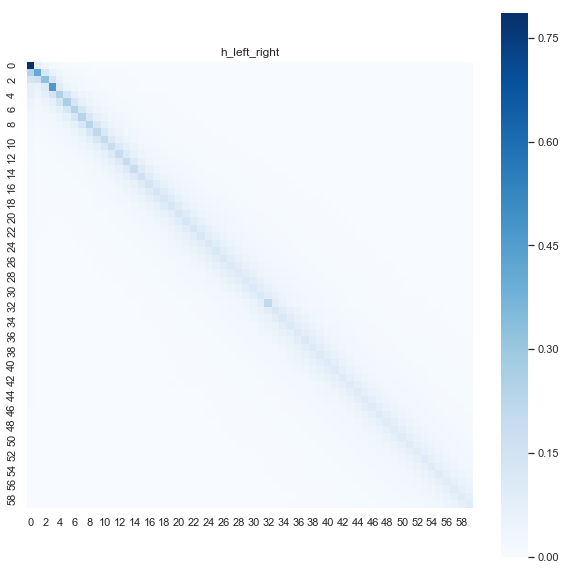

Matrix is regular:  True
Marix is recurrent:  True


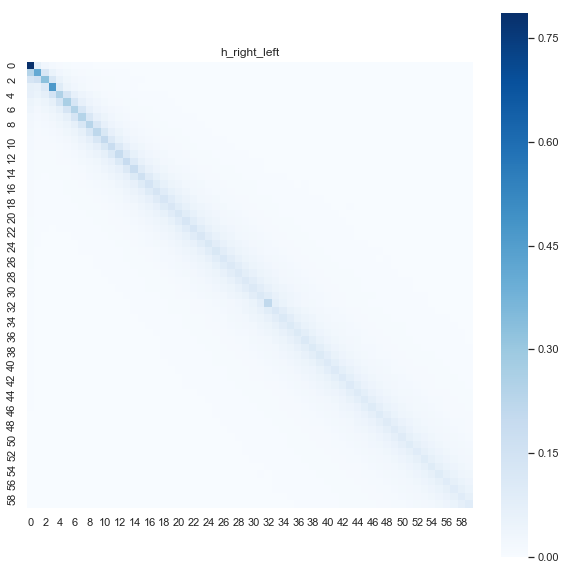

Matrix is regular:  True
Marix is recurrent:  True


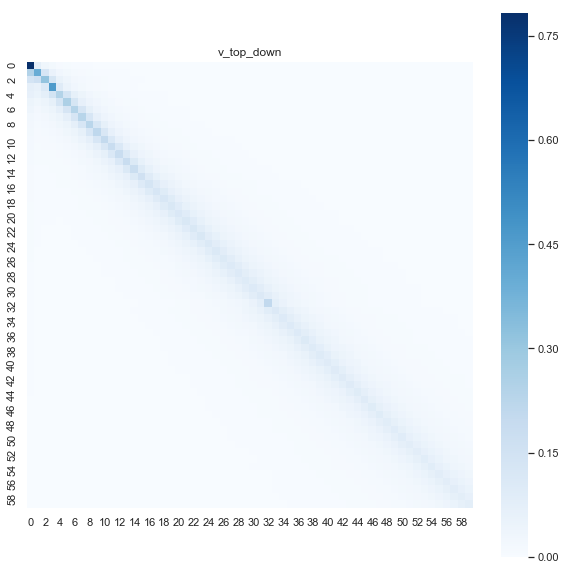

Matrix is regular:  True
Marix is recurrent:  True


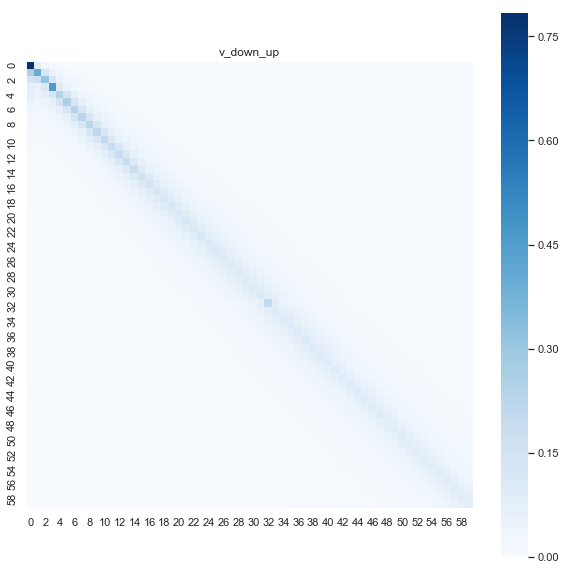

Matrix is regular:  True
Marix is recurrent:  True


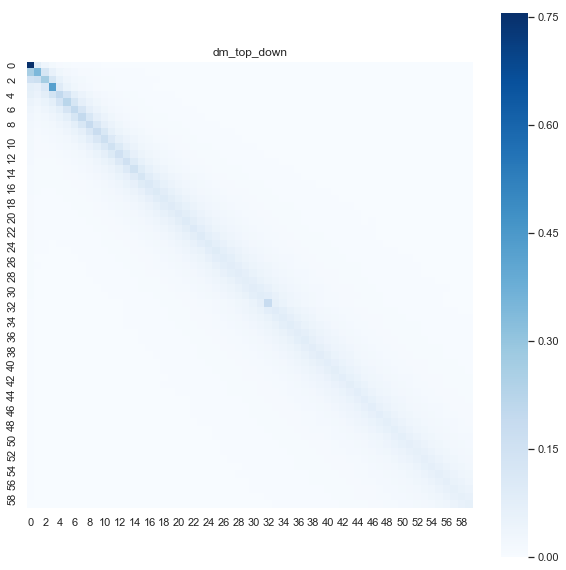

Matrix is regular:  True
Marix is recurrent:  True


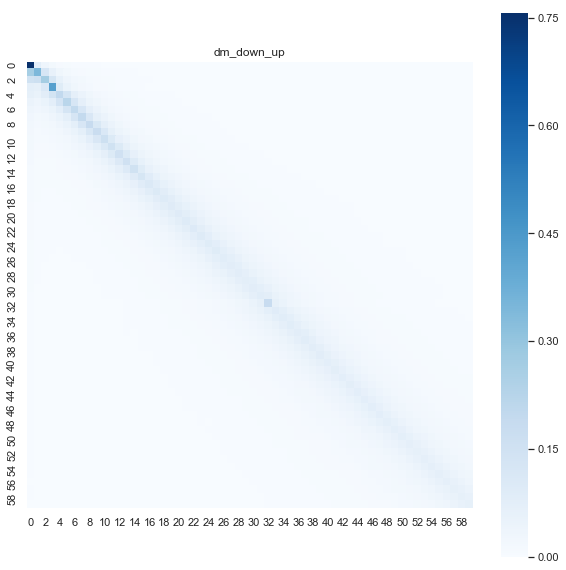

Matrix is regular:  True
Marix is recurrent:  True


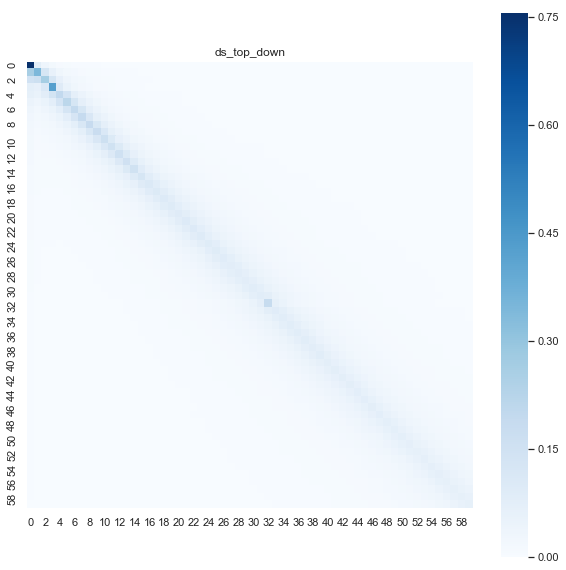

Matrix is regular:  True
Marix is recurrent:  True


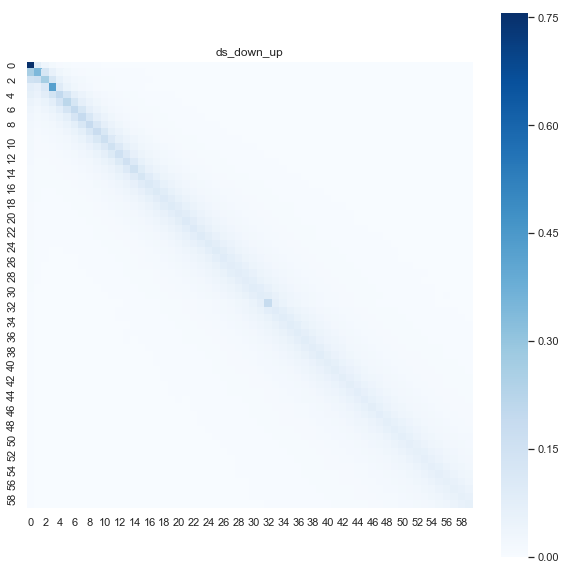

Matrix is regular:  True
Marix is recurrent:  True


In [22]:
hmm_types = ['h_left_right', 'h_right_left', 'v_top_down', 'v_down_up', 'dm_top_down', 'dm_down_up', 'ds_top_down', 'ds_down_up']

for i, type_ in enumerate(hmm_types):
    matrix = general_stochastic_matrix(images, hmm_type=type_)
    plt.figure(figsize=(10, 10))
    plt.title(type_)
    sns.heatmap(matrix[:6 * 10, :6 * 10], square=True, cmap='Blues')
    plt.show();
    
    regular = regularity_check(matrix, k = 5)
    print('Matrix is regular: ', regular)
    recurrent = recurrence_check(matrix, k = 5)
    print('Marix is recurrent: ', recurrent)